Machine Intelligence 2 - Exercise 4 - Density Transformation

Group : Bramantyo Supriyatno, Julie Morgan, Poulami Ghosh

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

sns.set(style="ticks", context="talk", palette="pastel")
plt.style.use('dark_background')

In [10]:
def f1(y, b=2, myu=1):
    return b * np.log(2*y) + myu

In [11]:
def f2(y, b=2, myu=1):
    return myu - b*np.log(2-2*y)

In [12]:
b = 2
myu = 1

In [13]:
samples = np.random.uniform(0,1,5000)

first method

In [14]:
lower_bound = f1(samples)
upper_bound = f2(samples)
y1 = lower_bound*(samples<0.5)
y2 = upper_bound*(samples>=0.5)
c = y1+y2

second method

In [15]:
x = np.arange(-100,100,0.01)
mu = 1
pdf = (1/2*b)*np.exp(-abs(x-mu)/b)
cdf = np.cumsum(pdf)
cdf_norm = cdf/np.max(cdf)
inverse_cdf = interpolate.interp1d(cdf_norm,x)
new_x = inverse_cdf(samples)


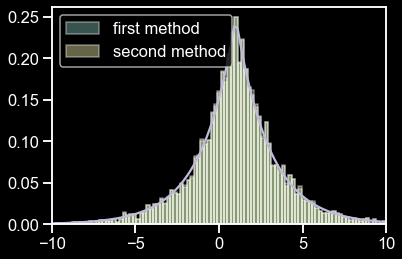

In [16]:
bins = np.linspace(-10,10,100)
plt.hist(c, bins, density=True, alpha=0.4, label='first method')
plt.hist(new_x, bins, density=True, alpha=0.4, label='second method')

xs = np.linspace(-10, 10, 100)

s_pdf = (1/(2*b))*np.exp(-np.abs(xs-mu)/b)

plt.plot(xs,s_pdf)

plt.xlim(-10,10)
plt.legend()
plt.show()